In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
CHK = wb.DataReader('CHK', data_source='yahoo', start='1993-12-7')

In [3]:
CHK.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1993-12-07,147.167038,131.399139,134.027115,131.399139,2000.0,110.366234
1993-12-08,147.167038,131.399139,131.399139,147.167038,0.0,123.610153
1993-12-09,147.167038,131.399139,131.399139,147.167038,400.0,123.610153
1993-12-10,147.167038,126.143173,141.911072,131.399139,1400.0,110.366234
1993-12-13,147.167038,126.143173,126.143173,128.771149,500.0,108.158875


In [4]:
CHK.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-05,18.340000,15.26,17.129999,15.47,2804100.0,15.47
2020-05-06,16.700001,14.30,16.000000,14.85,1196900.0,14.85
2020-05-07,15.440000,14.55,15.010000,14.60,1357500.0,14.60
2020-05-08,15.050000,13.88,14.910000,14.70,1323700.0,14.70
2020-05-11,14.770000,12.71,14.460000,12.90,2128800.0,12.90


In [5]:
# Calculate the simple rate of return: (ending price - beginning price) / beginning price
# Create a new column titles "simple return"
# use pandas.DataFrame.shift(# of lags) to shift the index one day at time (taking from prev trading day)
# This will calculate the daily rate of change, notice that NaN is present on the first row b/c there's no previous day to calculte from
CHK['simple_return'] = (CHK['Adj Close'] / CHK['Adj Close'].shift(1)) - 1
CHK['simple_return']

Date
1993-12-07         NaN
1993-12-08    0.120000
1993-12-09    0.000000
1993-12-10   -0.107143
1993-12-13   -0.020000
                ...   
2020-05-05   -0.006423
2020-05-06   -0.040078
2020-05-07   -0.016835
2020-05-08    0.006849
2020-05-11   -0.122449
Name: simple_return, Length: 6654, dtype: float64

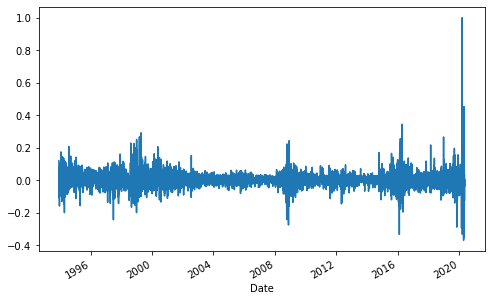

In [6]:
CHK['simple_return'].plot(figsize=(8,5))
plt.show()

In [7]:
avg_returns_CHK_day = CHK['simple_return'].mean()
avg_returns_CHK_day

0.000625021528613955

In [8]:
avg_returns_CHK_annual = CHK['simple_return'].mean() * 250
avg_returns_CHK_annual

0.15625538215348875

In [13]:
avg_returns_CHK_annual

0.15625538215348875

In [15]:
# make the average daily change more presentable by rounding to 3 decimal places and transfering the integer into a string
# (str(round(avg_returns_CHK_annual, 5) * 100 + '%')) - Not working properly, adding a percentage through a f'string print method
f"{avg_returns_CHK_annual} %"

'0.15625538215348875 %'